In [2]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('Pantheon.csv')
dataset.head()

,Name,zcmb,zhel,dz,mb,dmb
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435


In [5]:
dataset = dataset.drop(['dz', 'zhel', 'Name'], axis=1)
dataset.head()

,zcmb,mb,dmb
0,0.50309,22.93445,0.12605
1,0.49480,22.88020,0.11765
2,0.67767,24.03770,0.20560
3,0.86650,24.34685,0.17385
4,0.79857,24.36050,0.17435


In [6]:
y = dataset['mb']
X = dataset.drop('mb',axis=1)

Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [9]:
%%time
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

CPU times: user 3.96 ms, sys: 2.3 ms, total: 6.26 ms
Wall time: 33.7 ms


In [15]:
%%time
predictions = lr_model.predict(X_test)

CPU times: user 2.94 ms, sys: 0 ns, total: 2.94 ms
Wall time: 2.92 ms


In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.016255495686171
MSE: 1.5374277199585593
RMSE: 1.2399305302953707


In [14]:
print(lr_model.coef_)
print(lr_model.intercept_)

[ 9.86400023 -8.65883686]
18.92496719073671


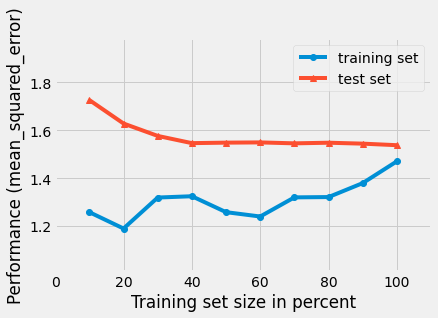

In [17]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt

plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=lr_model,
                     scoring="mean_squared_error",
                     print_model=False)

plt.show()

Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor 

In [19]:
%%time
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state=123)
rf.fit(X_train, y_train)

CPU times: user 560 ms, sys: 4.58 ms, total: 564 ms
Wall time: 566 ms


In [20]:
%%time
rf_pred = rf.predict(X_test)
rf_pred2 = rf.predict(X_train)

CPU times: user 106 ms, sys: 0 ns, total: 106 ms
Wall time: 107 ms


In [21]:
rmse_test = metrics.mean_squared_error(y_test, rf_pred)**(1/2)
rmse_train = metrics.mean_squared_error(y_train, rf_pred2)**(1/2)

print("Test set RMSE: %f " % (rmse_test))
print("Train set RMSE: %f " % (rmse_train))

Test set RMSE: 0.770118 
Train set RMSE: 0.740935 


In [22]:
%%time
rf_params = {'max_depth': [3,4,5,6],'min_samples_leaf':[0.04,0.06,0.08], 'max_features':[0.2,0.4,0.6,0.8]}

from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv=10,
                     scoring='neg_mean_squared_error',
                     verbose=1)


grid_rf.fit(X_train, y_train)

print('Best parameters found for rf: ', grid_rf.best_params_)
print('Lowerst RMSE found for rf: ', np.sqrt(np.sqrt(np.abs(grid_rf.best_score_))))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters found for rf:  {'max_depth': 6, 'max_features': 0.2, 'min_samples_leaf': 0.04}
Lowerst RMSE found for rf:  0.7957288988486106
CPU times: user 4min 42s, sys: 3.26 s, total: 4min 46s
Wall time: 4min 44s


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 0.5702456501291316
MSE: 0.5930823340233972
RMSE: 0.7701183896151274


In [24]:
rf.feature_importances_

array([1., 0.])

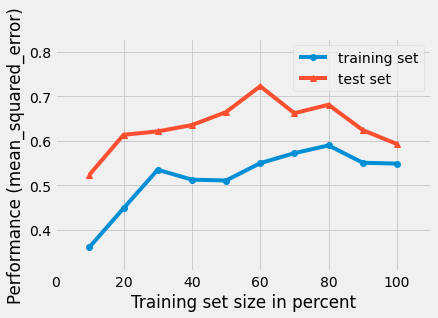

In [25]:
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=rf,
                     scoring="mean_squared_error",
                     print_model=False)

plt.show()

Xgboost regressor

In [26]:
import xgboost as xgb

In [27]:
#Let's attempt an XGBoost Regressor to see if we can get a better performance
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree= 0.3, learning_rate = 0.1,
                            max_depth = 5, alpha = 10, n_estimators = 10)

In [28]:
%%time
xg_reg.fit(X_train, y_train)

[20:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 49.1 ms, sys: 177 ms, total: 226 ms
Wall time: 484 ms


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [29]:
%%time
preds = xg_reg.predict(X_test)
preds2 = xg_reg.predict(X_train)

CPU times: user 752 µs, sys: 2.01 ms, total: 2.76 ms
Wall time: 2.8 ms


In [30]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
rmse2 = np.sqrt(metrics.mean_squared_error(y_train, preds2))
print("Attmept 1 Test RMSE: %f" % (rmse))
print("Attempt 1 Train RMSE: %f" % (rmse2))

Attmept 1 Test RMSE: 7.181339
Attempt 1 Train RMSE: 7.216238


In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 7.0253042560493455
MSE: 51.571632824098145
RMSE: 7.181339208260402


In [32]:
#Add cross validation to yield better performance. First, create params dictionary
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1, 'maz_depth':5,
         'alpha':10}

In [33]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [34]:
#Now cross validate
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold = 3, num_boost_round=50, early_stopping_rounds=10,
                   metrics="rmse", as_pandas=True,seed=123)

[20:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
#Review output of results
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,18.284318,0.062057,18.283240,0.121082
1,16.474530,0.055416,16.473949,0.100926
2,14.855779,0.056659,14.852405,0.094100
3,13.400025,0.043332,13.401751,0.099625
4,12.085801,0.042076,12.087668,0.086703


In [36]:
#Review cross validated results
print((cv_results['test-rmse-mean']).tail(1))
print((cv_results['train-rmse-mean']).tail(1))

49    0.342357
Name: test-rmse-mean, dtype: float64
49    0.328904
Name: train-rmse-mean, dtype: float64


In [37]:
#Although better, let's add grid search to find best parameters. First, define parameters
gbm_param_grid = {'learning rate': [0.01, 0.1, 0.5, 0.9], 'n_estimators': [200], 'subsample':[0.3,0.5,0.9]}

In [38]:
#Second, initialize model and run cross validation on initialized estimator
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=4, verbose=1)

In [ ]:
#Third, fit cross validated model
%%time
grid_mse.fit(X, y)

In [40]:
#Print best performing parameters and their RMSE scores
print('Best parameters found: ', grid_mse.best_params_)
print('Lowerst RMSE found: ', np.sqrt(np.sqrt(np.abs(grid_mse.best_score_))))

Best parameters found:  {'learning rate': 0.01, 'n_estimators': 200, 'subsample': 0.9}
Lowerst RMSE found:  0.6933295663256882


[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

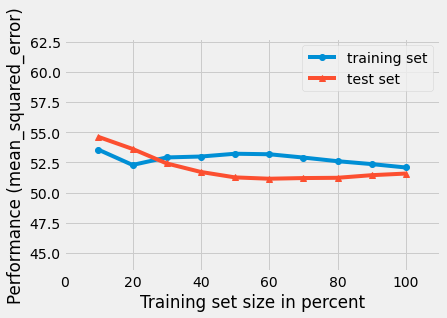

In [41]:
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=xg_reg,
                     scoring="mean_squared_error",
                     print_model=False)

plt.show()

Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [43]:
%%time
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

CPU times: user 468 ms, sys: 15.1 ms, total: 483 ms
Wall time: 476 ms


In [44]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-1.5058760636889983


In [45]:
%%time
prediction_ridge=ridge_regressor.predict(X_test)

CPU times: user 2.99 ms, sys: 0 ns, total: 2.99 ms
Wall time: 2.97 ms


In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_ridge))
print('MSE:', metrics.mean_squared_error(y_test, prediction_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))

MAE: 1.0167603177474493
MSE: 1.537836556333533
RMSE: 1.240095381949926


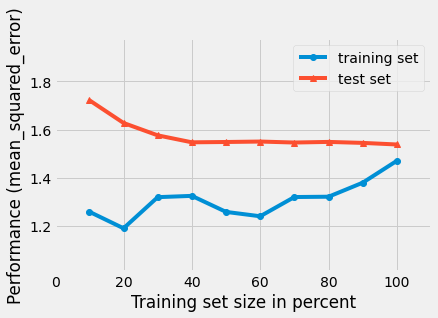

In [47]:
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=ridge_regressor,
                     scoring="mean_squared_error",
                     print_model=False)

plt.show()

Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [52]:
%%time
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.321e+00, tolerance: 3.205e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+00, tolerance: 3.393e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

CPU times: user 481 ms, sys: 5.17 ms, total: 486 ms
Wall time: 480 ms


In [53]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-1.505925369713649


In [54]:
%%time
prediction_lasso=lasso_regressor.predict(X_test)

CPU times: user 2.63 ms, sys: 10 µs, total: 2.64 ms
Wall time: 2.96 ms


In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 1.0162554956861742
MSE: 1.537427719958562
RMSE: 1.2399305302953718


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.865e-01, tolerance: 3.855e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e-01, tolerance: 6.632e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

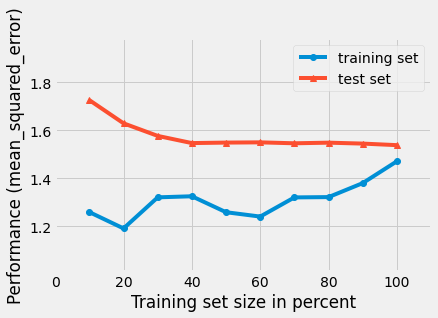

In [56]:
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=lasso_regressor,
                     scoring="mean_squared_error",
                     print_model=False)

plt.show()

Comparing Table

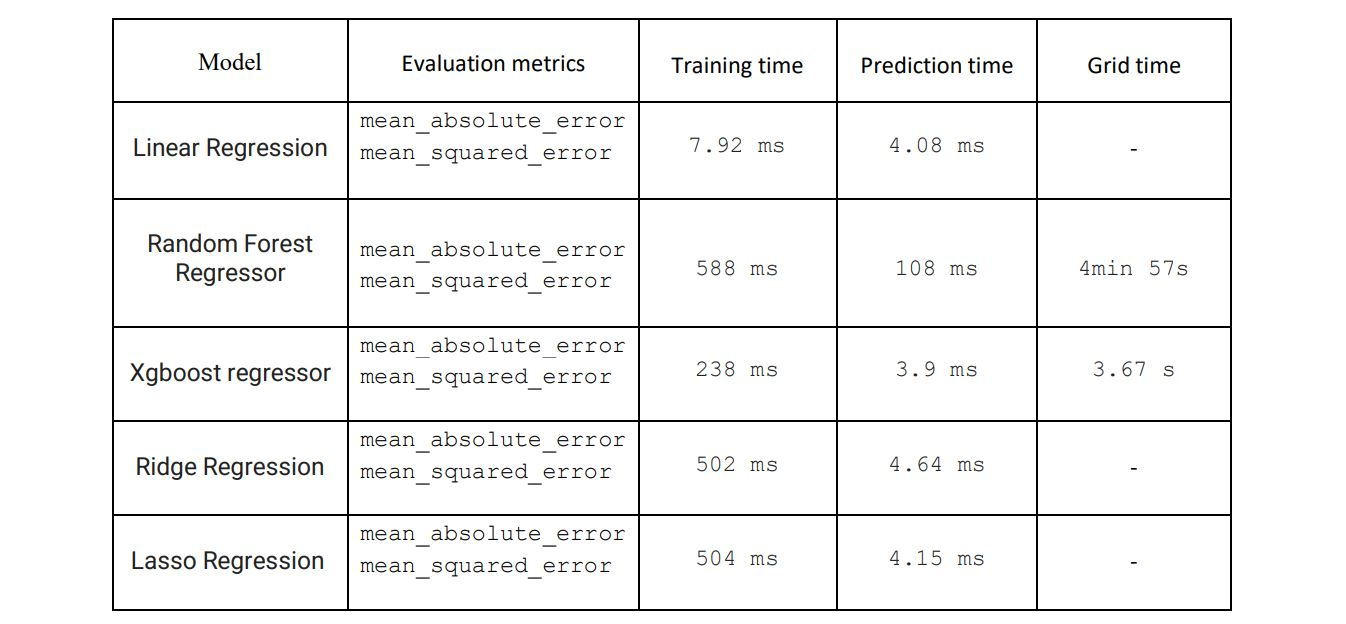

Analysis of Results

قبل از تحلیل نتایج لازم است اشاره کنیم
پارامتر هابل مستقیما در این دیتاست به صورت رصدی مشاهده نشده است و در هر ردشیفت کمیت
$mb$
که همان
$Apearent \,\, magnitude\,\, in\,\, band \,\, B$
است را داریم. از روی این کمیت پارامتر هابل بدست میاید اما اینکار را اینجا انجام ندادیم چون درنظر داشتیم بدون هیچ پیشفرض مدلی در کیهان شناسی پیش برویم.

دلیل استفاده ما از متریک های
$mean \, \, absolute \, \, error$
و
$mean \, \, squared \, \, error$
در همه مدل ها این بود که این متریک ها، متریک های مناسبی برای مساله رگرسیون هستند.

مدل
$Random \, \, Forest \, \, Regressor$
خطای کمتری را نسبت به سایر مدل ها به عنوان خروجی بازگرداند. نشان میدهد مدل مناسبی برای مساله مورد نظر ماست.

خطایی که
مدل اول یا در واقع
$Linear \, \, Regression$
داده است
به این دلیل است که تابع خطی فیت میکند و داده های ما به صورتی نبود که به آنها یک خط مناسب فیت شود.
بنابراین این روش خطای قابل پیشبینی ای داشت.

خطای دو مدل آخر یعنی
$Ridge \, \, Regression$
و
$Lasso \, \,  Regression$
تقریبا در مرتبه
مدل اول است.

دلیل زیاد بودن خطای
$Xgboost\, \,  regressor$
میتواند پیچیدگی مدل باشد که باعث اورفیتیتنیگ میشود. این اتفاق برای مثال
در مدل
$Linear \, \, Regression$
که مدل ساده تریست نمیفتد و اورفیت آن کم است.